In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
import sys
import os 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import netCDF4 as cdf 
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar
from maptools import select_map
import csv

In [12]:
biomes_sib_koppen=['No biome specified',                                         #0
                  'Tall Broadleaf-Evergreen Trees, Climate = Trop. Rainforest',  #1
                  'Tall Broadleaf-Evergreen Trees, Climate = Trop. Monsoon',     #2
                  'Tall Broadleaf-Evergreen Trees, Climate = Trop. Savannah',    #3
                  'Tall Broadleaf-Evergreen Trees, Outside South America',       #4
                  'Tall Broadleaf-Deciduous Trees',                              #5
                  'Tall Broadleaf and Needleleaf Trees',                         #6
                  'Tall Needleleaf Trees',                                       #7
                  'Tall Needleleaf-Deciduous Trees',                             #8
                  'Short Vegetation (Savanna)',                                  #9
                  'Short Vegetation (Grasslands)',                               #10
                  'Short Vegetation (None)',                                     #11
                  'Short Broadleaf Shrubs - Bare Soil',                          #12
                  'Short Ground Cover (Tundra)',                                 #13
                  'No Vegetation (Low Latitude Desert)',                         #14
                  'Agriculture']                                                 #15

biomes_casa=['Water',                        #0
             'Evergreen needleleaf forest',  #1
             'Evergreen broadleaf forest',   #2
             'Deciduous needleleaf forest',  #3
             'Deciduous broadleaf forest',   #4
             'Mixed forests',                #5
             'Shrublands',                   #6
             'Savanna and grasslands',       #7 
             'Permanent wetlands',           #8
             'Croplands',                    #9
             'Urban and built-up',           #10
             'Barren or sparsely vegetated', #11
             'Permanent snow and ice']       #12

clrs_casa=['darkgreen',     #1
           'magenta',       #4
           'brown',         #6
           'lawngreen',     #7
           'darkslateblue'] #9
           

biomes_sibcasa = ['No biome specified',                     #0
            'Tall Broadleaf-Evergreen Trees',         #1
            'Tall Broadleaf-Deciduous Trees',         #2
            'Tall Broadleaf and Needleleaf Trees',    #3
            'Tall Needleleaf Trees',                  #4
            'Tall Needleleaf-DECIDUOUS Trees',        #5
            'Short Vegetation (Savanna)',             #6
            'Short Vegetation (Grasslands)',          #7 
            'Short Vegetation (None)',                #8
            'Short Broadleaf Shrubs with Bare Soil',  #9
            'Short Ground Cover (Tundra)',            #10
            'No Vegetation (Low Latitude Desert)',    #11
            'Agriculture'] 

clrs_sib_koppen=['lightgray',     #0
                  'darkblue',      #1
                  'blue',          #2
                  'lightblue',     #3
                  'green',         #4
                  'magenta',       #5
                  'orange',        #6
                  'darkgreen',     #7
                  'yellow',        #8
                  'tan',           #9
                  'lawngreen',     #10
                  'purple',        #11
                  'orangered',     #12
                  'brown',         #13
                  'wheat',         #14
                  'darkslateblue'] #15

clrs_sib = ['green',         #1
            'orange',        #3
            'tan',           #6
            'lawngreen',     #7
            'orangered',     #9
            'brown',         #10
            'darkslateblue'] #12

labels = ['SiBCASA-GFED4','CASA-GFED4','CASA-GFED4-d']

biofireparamdirs = [
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/',
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/',
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/', #FINN
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-3h-fires-monthly-bio/', #CASA-GFED4 fires 3h
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/'#CASA-GFED4 fires daily
]


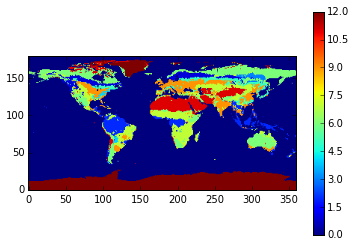

In [18]:
#CASA LC

ff='Landcover2.csv'
biomesmap=[]

with open(ff,'rb') as csvfile:
    csvreader=csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        biomesmap.append([float(item) for item in row]) 
        
biomesmap=np.array(biomesmap)
biomesmap=biomesmap[::-1]
biomes_casa_1x1=np.zeros((180,360),float)

for i in range(180):
    for j in range(360):
        lst = biomesmap[i+i:(i+1)*2,j+j:(j+1)*2].flatten().tolist()
        biomes_casa_1x1[i,j]=max(set(lst), key=lst.count)
imshow(biomes_casa_1x1)
colorbar()
plt.gca().invert_yaxis()

In [19]:
# SIBCASA LC
f = cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/regions_sibcasa.nc') # assigning to f the dataset from the netcdf file 
biomes_sib = f.variables['land_ecosystems'][:]  # This biomes, include the whole world and the ocean has nothing assigned (NaN).
f.close() 
print type(biomes_sib), shape(biomes_sib)


<class 'numpy.ma.core.MaskedArray'> (180, 360)


In [20]:
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
print mf.file_format 
print mf.dimensions.keys()
print mf.dimensions['longitude'] 
print mf.dimensions['latitude']

# the mask has a 1x1 degree resolution
mask = mf.variables['regionmask'][:]
fac = 86400.*365.*12./1.e15
glarea = globarea(im=360,jm=180)
print glarea.sum()

NETCDF4
[u'longitude', u'latitude']
<type 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 360

<type 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 180

5.1006447191e+14


In [21]:
# Loading the annual emissions for the amazon
#filetoload = '/Users/botia/daily_fires/fire amazon per pixel per year.npy' # this file is with CASA biome 7 as Savanna in Sibcasa
#fires = np.load(filetoload)
#filetoload = '/Users/botia/daily_fires/fire_year_layered_erik.npy'  # this file is with CASA biome 7 as Savanna in Sibcasa
filetoload = '/Users/botia/daily_fires/fire_year_layered_erik_all_grs.npy'
fires_all_gl = np.load(filetoload)
fires = fires_all_gl * mask
biome_separate_years = False

minyear = 2010
maxyear = 2016

years = range(minyear,maxyear)

biomes_mod = ['No biome specified','Tall Broadleaf and Needleleaf Trees','Tall Broadleaf-Evergreen Trees',
              'Tall Needleleaf Trees','Tall Broadleaf-Deciduous Trees','Tall Needleleaf-DECIDUOUS Trees',
              'Short Broadleaf Shrubs with Bare Soil','Short Vegetation (Savanna)','Short Vegetation (Grasslands)',
              'Agriculture','Short Vegetation (None)','Short Ground Cover (Tundra)',
              'No Vegetation (Low Latitude Desert)']

#I modified the biome names list due to the re assignation when using CASA's landcover, So this list is the equivalent of 
#CASA's landcover with SiBCASA's biomes.

for y in range(len(years)):
    
    if biome_separate_years: 
        biome_names_list = []
        percentage_list = []
        emissions_list = []
            
        for b in range(1,13):
            indexb = np.where(biomes_casa_1x1*mask == b)
            
            biome_names_list.append(biomes_mod[b])
            emissions_list.append(fires[y][indexb].sum()/12)
            percentage_list.append(((fires[y][indexb].sum()/12)/(fires[y].sum()/12))*100)

        #data_series_per = {'%s-%i'%('SiBCASA_CASA_LC',years[y]):percentage_list}
        #data_series_emi = {'%s-%i'%('SiBCASA_CASA_LC',years[y]):emissions_list}
        data_series_per = {'%s-%i'%('SiBCASA_CASA_LC_allgrs',years[y]):percentage_list}
        data_series_emi = {'%s-%i'%('SiBCASA_CASA_LC_allgrs',years[y]):emissions_list}

        if years[y] == minyear:
            #df_SiB_CASA_LC_emi = pd.DataFrame(data_series_emi,index = biome_names_list)
            #df_SiB_CASA_LC_per = pd.DataFrame(data_series_per, index = biome_names_list)
            df_SiB_CASA_LC_emi_allgrs = pd.DataFrame(data_series_emi,index = biome_names_list)
            df_SiB_CASA_LC_per_allgrs = pd.DataFrame(data_series_per, index = biome_names_list)

        else:
            #df_SiB_CASA_LC_emi['%s-%i'%('SiBCASA_CASA_LC_allgrs',years[y])] = pd.Series(emissions_list,index = df_SiB_CASA_LC_emi.index)
            #df_SiB_CASA_LC_per['%s-%i'%('SiBCASA_CASA_LC_allgrs',years[y])] = pd.Series(percentage_list,index = df_SiB_CASA_LC_per.index)
            df_SiB_CASA_LC_emi_allgrs['%s-%i'%('SiBCASA_CASA_LC_allgrs',years[y])] = pd.Series(emissions_list,index = df_SiB_CASA_LC_emi_allgrs.index)
            df_SiB_CASA_LC_per_allgrs['%s-%i'%('SiBCASA_CASA_LC_allgrs',years[y])] = pd.Series(percentage_list,index = df_SiB_CASA_LC_per_allgrs.index)

    else:
        if years[y] == minyear:
            fire_biomes = fires[y].sum()/12  
            
        else:
            fire_biomes = fire_biomes + fires[y].sum()/12 
            
        #print years[y] 
        #fire_pie_list = []
        fire_pie_list_grs = []
        
        for b in range(1,13):
            indexb = np.where(biomes_casa_1x1*mask == b)
            if len(indexb[0]) == 0:
                #fire_pie_list.append(0)
                fire_pie_list_grs.append(0)
            else:
                #fire_pie_list.append(((fires[y][indexb].sum()/12)/(fires[y].sum()/12))*100)
                fire_pie_list_grs.append(((fires[y][indexb].sum()/12)/(fires[y].sum()/12))*100)
        #print fire_pie_list
#print sum(fire_pie_list)
print sum(fire_pie_list_grs)

# This script generates a list with the emission percentages of CASA's landcover and the dataframes for separate years

100.0


In [65]:
df_SiB_CASA_LC_per.to_pickle('new_LC_percen_allsav')

In [66]:
df_SiB_CASA_LC_emi.to_pickle('new_LC_emissions_allsav')

In [52]:
df_SiB_CASA_LC_per_allgrs.to_pickle('new_LC_percen_allgrs')

In [53]:
df_SiB_CASA_LC_emi_allgrs.to_pickle('new_LC_emissions_allgrs')

# The next script is to generate the pie lists for the standard sibcasa and casa LC

In [22]:
minyear = 2010
maxyear = 2016

years = range(minyear,maxyear)

for ii,dirbf in enumerate(biofireparamdirs):
    print dirbf
    for y in range(minyear,maxyear): 
        for fname in os.listdir(dirbf):
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue  
            bf = cdf.Dataset(dirbf+fname)           # the next if is to check if the co2fire variable is in the files within 
                                                    # the directory
            if 'co2fire' in bf.variables.keys():    # bf is in 1x1 degree
                bb = np.float32(bf.variables['co2fire'][:])
            else: bb = bf.variables['bb'][:]
            if bb.shape[0] == 180:                  # adds time dimension
                bb.resize(1,180,360)
            try: 
                bb[bb.mask] = 0
                bb = np.array(bb)
            except: pass
            if int(fname[-5:-3]) == 1:              
                bb_sum = bb                         
            else: bb_sum = np.append(bb_sum,bb,axis=0)   
            bf.close()    
        bb_sum = bb_sum.mean(axis=0)                                          
        mask = mask                                 
        if y == minyear:
            bb_biomes = bb_sum             
        else:
            bb_biomes = bb_biomes + bb_sum 
    print ii, (bb_biomes*mask*glarea*fac).sum()
    
    # Here I generate the list with emission percentages for merged years for each biome. The dataframes are done after the pie plots
    if ii == 0:
        pie_list_sib  = []
        for b in range(1,14):
            indexb = np.where(biomes_sib*mask == b)
            if len(indexb[0]) == 0:
                pie_list_sib.append(0)    
            else:
                pie_list_sib.append(((bb_biomes*mask*glarea*fac)[indexb].sum()/(bb_biomes*mask*glarea*fac).sum())*100)
        print sum(pie_list_sib)
    if ii == 1:
        pie_list_casa  = []
        for b in range(1,14):
            indexb = np.where(biomes_casa_1x1*mask == b)
            if len(indexb[0]) == 0:
                pie_list_casa.append(0)    
            else:
                pie_list_casa.append(((bb_biomes*mask*glarea*fac)[indexb].sum()/(bb_biomes*mask*glarea*fac).sum())*100)
        print sum(pie_list_casa)
      

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
0 1.67846944396
100.0
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
1 1.19076144549
100.0


[96.526445038378171, 1.4515074523358569, 1.9763179659270287, 0.033786882676659795, 0.0060742052838954081, 0.0024786853921820312, 0.0033897700062156715] 100.0
[66.990615895626121, 0.19507378876784895, 0.10352744225351392, 32.591819577352538, 0.11896329599997159] 100.0
[96.876054471634859, 0.047839669656006355, 0.0018319165309868197, 3.0730046773103332, 0.0012692648678011172] 100.0
[99.88927584770552, 0.049327669100428857, 0.0018888962467736852, 0.058198843014657761, 0.0013087439325959543] 100.0


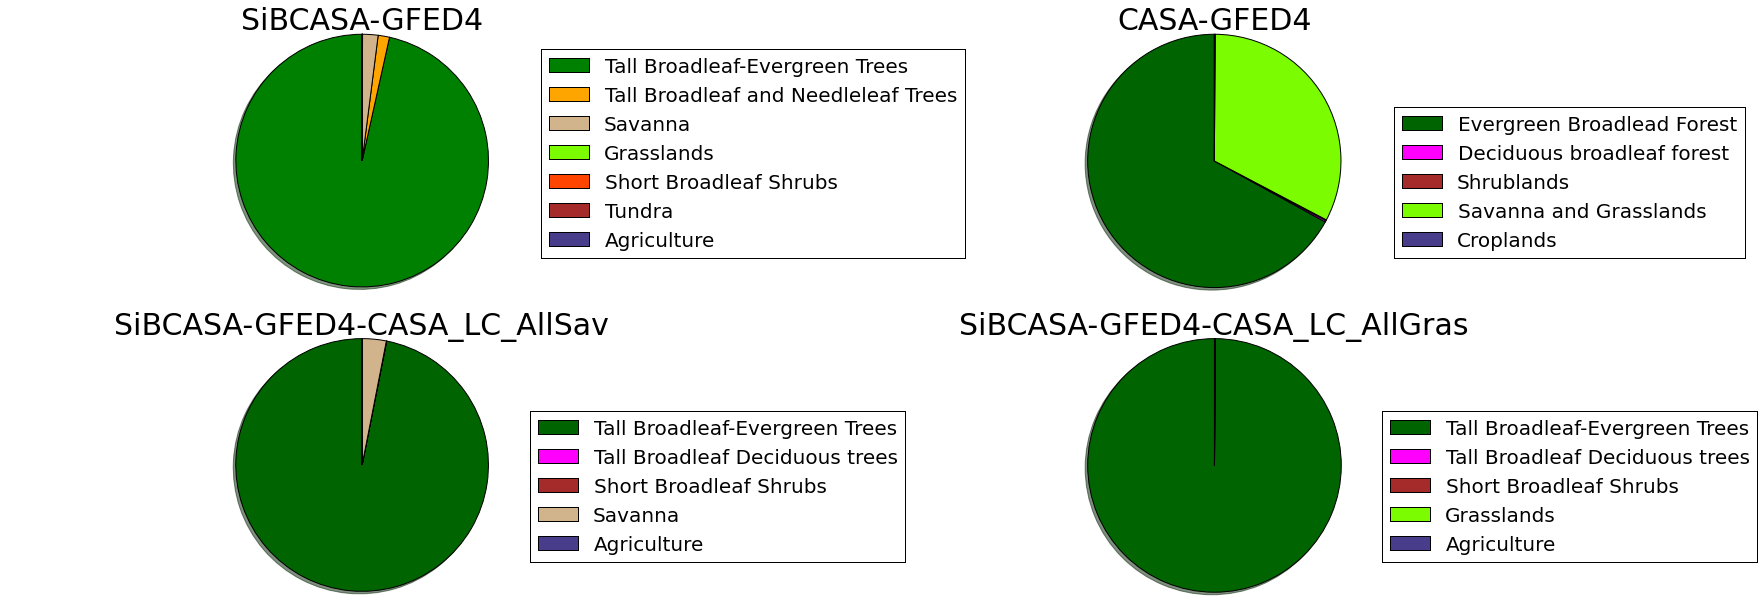

In [50]:
# Merged Year Analysis Pie Plots

fig = plt.figure(1,figsize=(28,10))
ax1 = plt.subplot(221)
ax1.set_title('SiBCASA-GFED4',fontsize=30)
ax2 = plt.subplot(222)
ax2.set_title('CASA-GFED4',fontsize=30)
ax3 = plt.subplot(223)
ax3.set_title('SiBCASA-GFED4-CASA_LC_AllSav',fontsize=30)
ax4 = plt.subplot(224)
ax4.set_title('SiBCASA-GFED4-CASA_LC_AllGras',fontsize=30)

c_casa   = ['darkgreen','magenta','brown','lawngreen','darkslateblue'] 
c_casa2   = ['darkgreen','magenta','brown','tan','darkslateblue']
c_sib    = ['green','orange', 'tan','lawngreen', 'orangered', 'brown', 'darkslateblue'] 

print pie_list_sib, sum(pie_list_sib)
print pie_list_casa, sum(pie_list_casa)
print fire_pie_list, sum(fire_pie_list)
print fire_pie_list_grs, sum(fire_pie_list_grs)


pie_list_sib[:]      = [item for item in pie_list_sib if item != 0]
pie_list_casa[:]     = [ite for ite in pie_list_casa if ite != 0]
fire_pie_list[:]     = [it for it in fire_pie_list if it != 0]
fire_pie_list_grs[:] = [i for i in fire_pie_list_grs if i != 0]

ax1.pie(pie_list_sib, colors = c_sib, startangle=90, shadow=True)
ax2.pie(pie_list_casa, colors = c_casa, startangle=90,shadow=True) 
ax3.pie(fire_pie_list, colors =  c_casa2, startangle=90,shadow=True) 
ax4.pie(fire_pie_list_grs, colors =  c_casa, startangle=90,shadow=True) 

ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal')
ax4.axis('equal')

lsib                 = ['Tall Broadleaf-Evergreen Trees','Tall Broadleaf and Needleleaf Trees','Savanna','Grasslands','Short Broadleaf Shrubs','Tundra','Agriculture']
lcasa                = ['Evergreen Broadlead Forest','Deciduous broadleaf forest','Shrublands','Savanna and Grasslands','Croplands']
lsibcasa_casa_lc     = ['Tall Broadleaf-Evergreen Trees', 'Tall Broadleaf Deciduous trees','Short Broadleaf Shrubs','Savanna', 'Agriculture']
lsibcasa_casa_allgrs = ['Tall Broadleaf-Evergreen Trees', 'Tall Broadleaf Deciduous trees','Short Broadleaf Shrubs','Grasslands', 'Agriculture']

ax1.legend(lsib[:],loc = 'lower center', bbox_to_anchor=(1.05, 0.08),fontsize='20')
ax2.legend(lcasa[:],loc = 'lower center', bbox_to_anchor=(1, 0.08),fontsize='20')
ax3.legend(lsibcasa_casa_lc[:],loc = 'lower center', bbox_to_anchor=(1, 0.08),fontsize='20')
ax4.legend(lsibcasa_casa_allgrs[:],loc = 'lower center', bbox_to_anchor=(1, 0.08),fontsize='20')

fig.savefig('NewBiomeAttri.png',bbox_inches='tight',DPI=1000)

In [60]:
# Dataframes per year
minyear = 2010
maxyear = 2016

years = range(minyear,maxyear)

for ii,dirbf in enumerate(biofireparamdirs):
    print dirbf
    for y in range(minyear,maxyear): 
        for fname in os.listdir(dirbf):
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue  
            bf = cdf.Dataset(dirbf+fname)           # the next if is to check if the co2fire variable is in the files within 
                                                    # the directory
            if 'co2fire' in bf.variables.keys():    # bf is in 1x1 degree
                bb = np.float32(bf.variables['co2fire'][:])
            else: bb = bf.variables['bb'][:]
            if bb.shape[0] == 180:                  # adds time dimension
                bb.resize(1,180,360)
            try: 
                bb[bb.mask] = 0
                bb = np.array(bb)
            except: pass
            if int(fname[-5:-3]) == 1:              
                bb_sum = bb                         
            else: bb_sum = np.append(bb_sum,bb,axis=0)   
            bf.close()    
        
        bb_sum = bb_sum.mean(axis=0)                           
        mask = mask                                 
        
        if ii == 0:
            biome_names_list = []
            percentage_list = []
            emissions_list = []
            for b in range(1,13):
                indexb = np.where(biomes_sib*mask == b)
                biome_names_list.append(biomes_sibcasa[b])
                percentage_list.append('%.5f'%(((bb_sum*mask*glarea*fac)[indexb].sum()/(bb_sum*mask*glarea*fac).sum())*100))
                emissions_list.append('%.5f'%(((bb_sum*mask*glarea*fac)[indexb].sum())))

            data_series = {'%s-%i'%(labels[ii],y):percentage_list}
            data_series_em = {'%s-%i'%(labels[ii],y):emissions_list}
            if y == minyear and ii == 0:
                df_biomes_sib_per = pd.DataFrame(data_series,index = biome_names_list)
                df_biomes_sib_em = pd.DataFrame(data_series_em,index = biome_names_list)
            else:
                df_biomes_sib_per['%s-%i'%(labels[ii],y)] = pd.Series(percentage_list,index = df_biomes_sib_per.index)
                df_biomes_sib_em['%s-%i'%(labels[ii],y)] = pd.Series(emissions_list,index = df_biomes_sib_em.index)
        
        if ii == 1:
            biome_names_list = []
            percentage_list = []
            emissions_list = []
            for b in range(1,13):
                indexb = np.where(biomes_casa_1x1*mask == b)
                biome_names_list.append(biomes_casa[b])
                percentage_list.append('%.5f'%(((bb_sum*mask*glarea*fac)[indexb].sum()/(bb_sum*mask*glarea*fac).sum())*100))
                emissions_list.append('%.5f'%(((bb_sum*mask*glarea*fac)[indexb].sum())))
            
            data_series = {'%s-%i'%(labels[ii],y):percentage_list}
            data_series_em = {'%s-%i'%(labels[ii],y):emissions_list}
            if y == minyear and ii == 1:
                df_biomes_casa_per = pd.DataFrame(data_series,index = biome_names_list)
                df_biomes_casa_em = pd.DataFrame(data_series_em,index = biome_names_list)
            else:
                df_biomes_casa_per['%s-%i'%(labels[ii],y)] = pd.Series(percentage_list,index = df_biomes_casa_per.index)
                df_biomes_casa_em['%s-%i'%(labels[ii],y)] = pd.Series(emissions_list,index = df_biomes_casa_em.index)
   

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/


In [61]:
df_biomes_sib_per.to_pickle('df_biomes_sib_per') # dataframe with the emissions percentages of sibcasa-gfed4 per year with sibcasa landcover
df_biomes_sib_em.to_pickle('df_biomes_sib_em') # dataframe with the emissions of sibcasa-gfed4 per year with sibcasa landcover
df_biomes_casa_em.to_pickle('df_biomes_casa_em') # dataframe with the emissions casa-gfed4 per year with casa landcover
df_biomes_casa_per.to_pickle('df_biomes_casa_per') # dataframe with the emissions percentages of casa-gfed4 per year with casa landcover

In [26]:
df_biomes_sib_per  = pd.read_pickle('df_biomes_sib_per')
df_biomes_sib_em   = pd.read_pickle('df_biomes_sib_em')

df_biomes_casa_em  = pd.read_pickle('df_biomes_casa_em')
df_biomes_casa_per = pd.read_pickle('df_biomes_casa_per')

df_SiB_CASA_LC_per = pd.read_pickle('new_LC_percen_allsav')
df_SiB_CASA_LC_emi = pd.read_pickle('new_LC_emissions_allsav')

df_SiB_CASA_LC_per_allgrs = pd.read_pickle('new_LC_percen_allgrs')
df_SiB_CASA_LC_emi_allgrs = pd.read_pickle('new_LC_emissions_allgrs')


In [27]:
df_biomes_sib_per.iloc[6:7,:]
df_biomes_casa_per.iloc[6:7,:] 
df_SiB_CASA_LC_per_allgrs.iloc[6:7,:] 
df_SiB_CASA_LC_per_allgrs.iloc[1:2,:] 
df_SiB_CASA_LC_per.iloc[1:2,:]  
df_SiB_CASA_LC_per_allgrs

,SiBCASA_CASA_LC_allgrs-2010,SiBCASA_CASA_LC_allgrs-2011,SiBCASA_CASA_LC_allgrs-2012,SiBCASA_CASA_LC_allgrs-2013,SiBCASA_CASA_LC_allgrs-2014,SiBCASA_CASA_LC_allgrs-2015
Tall Broadleaf and Needleleaf Trees,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tall Broadleaf-Evergreen Trees,99.850565,99.899878,99.865706,99.835219,99.839887,99.889276
Tall Needleleaf Trees,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tall Broadleaf-Deciduous Trees,0.072487,0.019139,0.027117,0.069747,0.062100,0.049328
Tall Needleleaf-DECIDUOUS Trees,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Short Broadleaf Shrubs with Bare Soil,0.000459,0.002032,0.001021,0.001591,0.001600,0.001889
Short Vegetation (Savanna),0.073333,0.075387,0.104606,0.091325,0.094618,0.058199
Short Vegetation (Grasslands),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Agriculture,0.003157,0.003564,0.001550,0.002117,0.001796,0.001309
Short Vegetation (None),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
# The complete information for all years and fire products, Percentages of emission per biome

# Slicing to define specific biomes per fireproduct
# Tall Broadleaf-Evergreen Trees
# Evergreen broadleaf
SiBCASA_GFED4_ebf = df_biomes_sib_per.iloc[0:1,:]
CASA_GFED4_ebf = df_biomes_casa_per.iloc[1:2,:]
SiB_CASA_LC_ebf = df_SiB_CASA_LC_per.iloc[1:2,:]  
SiB_CASA_LC_allgrs_ebf = df_SiB_CASA_LC_per_allgrs.iloc[1:2,:]  
evergreenbf = [SiBCASA_GFED4_ebf, CASA_GFED4_ebf, SiB_CASA_LC_ebf,SiB_CASA_LC_allgrs_ebf]

#Savannah
SiBCASA_GFED4_sav = df_biomes_sib_per.iloc[5:6,:]
CASA_GFED4_sav = df_biomes_casa_per.iloc[6:7,:]
SiB_CASA_LC_sav = df_SiB_CASA_LC_per.iloc[6:7,:]                    
savanna = [SiBCASA_GFED4_sav, CASA_GFED4_sav, SiB_CASA_LC_sav]

# Grasslands
SiBCASA_GFED4_gras = df_biomes_sib_per.iloc[6:7,:]
CASA_GFED4_gras = df_biomes_casa_per.iloc[6:7,:]
SiB_CASA_LC_gras = df_SiB_CASA_LC_per_allgrs.iloc[6:7,:] # is in the same position as Savanna but is graslands                    
grasslands = [SiBCASA_GFED4_gras, CASA_GFED4_gras, SiB_CASA_LC_gras]

In [29]:
# The complete information for all years and fire products, bb emissions per biome

# Slicing to define specific biomes per fireproduct
# Evergreen Broadleaf Trees
SiBCASA_GFED4_ebf_em = df_biomes_sib_em.iloc[0:1,:]
CASA_GFED4_ebf_em = df_biomes_casa_em.iloc[1:2,:]
SiB_CASA_LC_ebf_em = df_SiB_CASA_LC_emi.iloc[1:2,:] 
SiB_CASA_LC_allgrs_ebf_em = df_SiB_CASA_LC_emi_allgrs.iloc[1:2,:] 
evergreenbf_em = [SiBCASA_GFED4_ebf_em, CASA_GFED4_ebf_em, SiB_CASA_LC_ebf_em,SiB_CASA_LC_allgrs_ebf_em]

# Savannah
SiBCASA_GFED4_sav_em = df_biomes_sib_em.iloc[5:6,:]
CASA_GFED4_sav_em = df_biomes_casa_em.iloc[6:7,:]
SiB_CASA_LC_sav_em = df_SiB_CASA_LC_emi.iloc[6:7,:]                    
savanna_em = [SiBCASA_GFED4_sav_em, CASA_GFED4_sav_em, SiB_CASA_LC_sav_em]

# Grasslands
SiBCASA_GFED4_gras_em = df_biomes_sib_em.iloc[6:7,:]
CASA_GFED4_gras_em = df_biomes_casa_em.iloc[6:7,:]
SiB_CASA_LC_gras_em = df_SiB_CASA_LC_emi_allgrs.iloc[6:7,:] # is in the same position as Savanna but is graslands                    
grasslands_em = [SiBCASA_GFED4_gras_em, CASA_GFED4_gras_em, SiB_CASA_LC_gras_em]

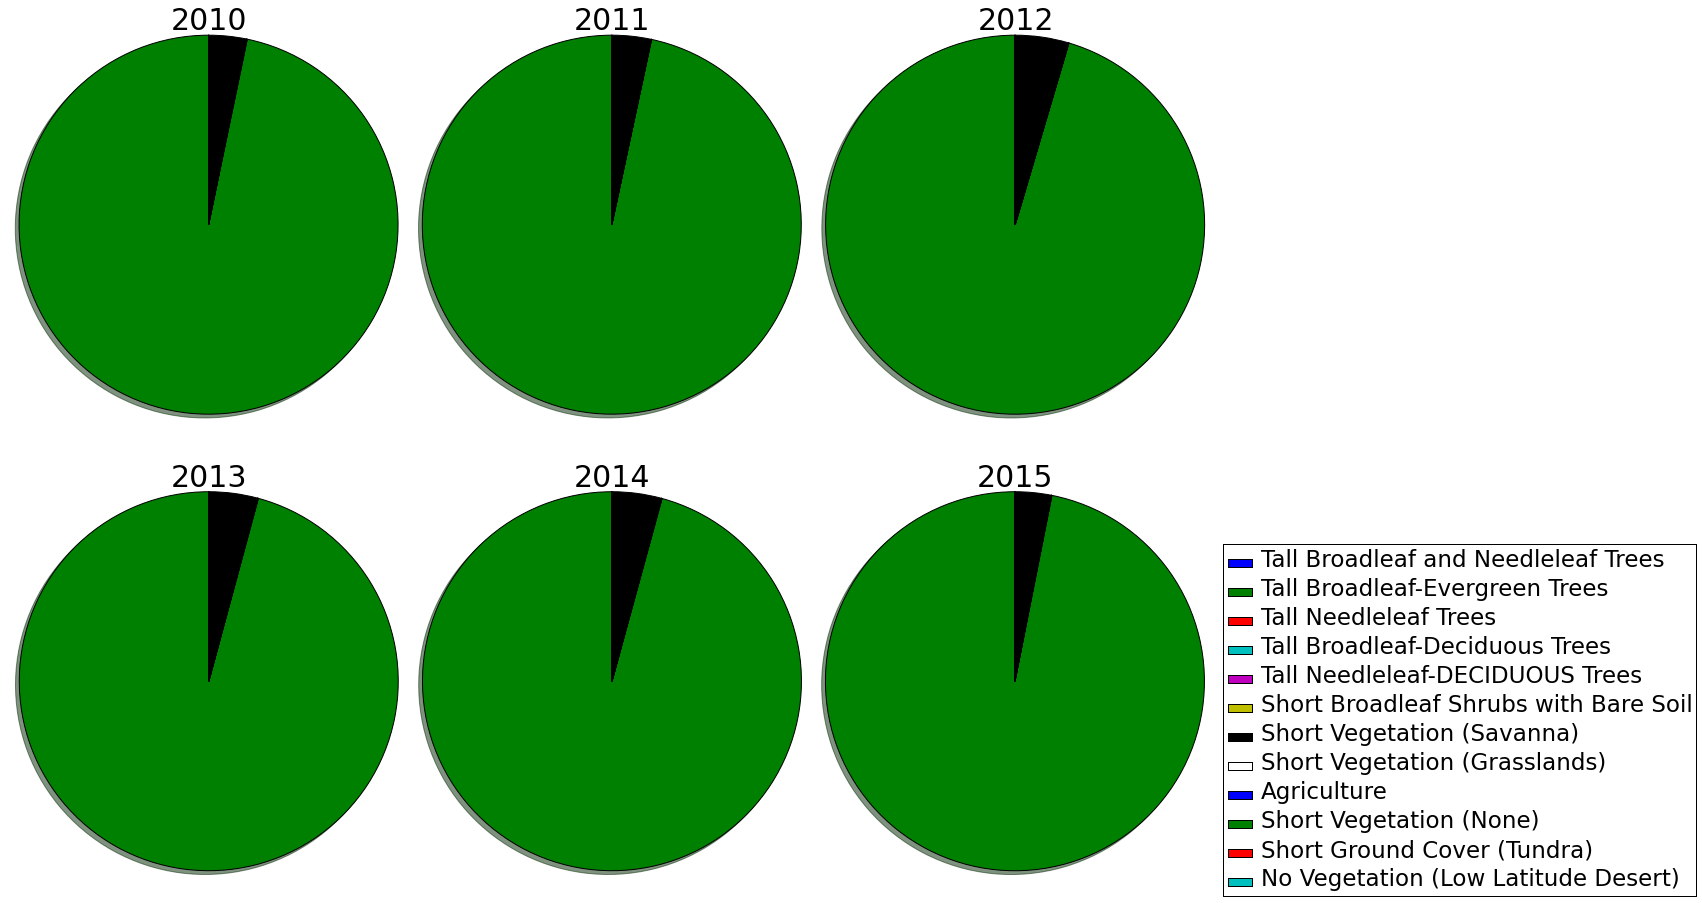

In [30]:
########################################### Yearly plots for each fire product ###############################################

biomes_mod = ['No biome specified','Tall Broadleaf and Needleleaf Trees','Tall Broadleaf-Evergreen Trees',
              'Tall Needleleaf Trees','Tall Broadleaf-Deciduous Trees','Tall Needleleaf-DECIDUOUS Trees',
              'Short Broadleaf Shrubs with Bare Soil','Short Vegetation (Savanna)','Short Vegetation (Grasslands)',
              'Agriculture','Short Vegetation (None)','Short Ground Cover (Tundra)',
              'No Vegetation (Low Latitude Desert)']

fig = plt.figure(1,figsize=(28,15))
fig.subplots_adjust(left=0,right=0.6,wspace=0)
ax1 = plt.subplot(231)
ax1.set_title('2010',fontsize=30)
ax2 = plt.subplot(232)
ax2.set_title('2011',fontsize=30)
ax3 = plt.subplot(233)
ax3.set_title('2012',fontsize=30)
ax4 = plt.subplot(234)
ax4.set_title('2013',fontsize=30)
ax5 = plt.subplot(235)
ax5.set_title('2014',fontsize=30)
ax6 = plt.subplot(236)
ax6.set_title('2015',fontsize=30)

############# Remember to change the name for 
############# the fireproduct that wants to be plotted

# df_biomes_sib_per, df_biomes_casa_per, df_SiB_CASA_LC_per 

fire_prod = df_SiB_CASA_LC_per   # cuando anada el 2015 se arregla
for i in range(6):
    year_perc = fire_prod.iloc[:,[i]]
    if i == 0:
        ax1.pie(year_perc,startangle=90,shadow=True)
    if i == 1:
        ax2.pie(year_perc,startangle=90,shadow=True)
    if i == 2:
        ax3.pie(year_perc,startangle=90,shadow=True)
    if i == 3:
        ax4.pie(year_perc,startangle=90,shadow=True)
    if i == 4:
        ax5.pie(year_perc,startangle=90,shadow=True)
    if i == 5:
        ax6.pie(year_perc,startangle=90,shadow=True)

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax4.axis('equal')
ax4.axis('equal')
ax5.axis('equal')
ax6.axis('equal')

ax6.legend(biomes_mod[1:],loc='center left', bbox_to_anchor=(1, 0.4)) #activate for df_SiB_CASA_LC_per  
#ax6.legend(biomes_casa[1:],loc='center left', bbox_to_anchor=(1, 1.2)) #activate for df_biomes_casa_per 
#ax6.legend(biomes_sibcasa[:],loc='center left', bbox_to_anchor=(1, 1.2)) #activate for df_biomes_sib_per 
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='23') 
#fig.savefig('SiB_CASA_LC.png')
plt.show()

# Pending: to Fix colors for each graph, similar to the merged year ones.

In [31]:
######################################### New data frames for each selected biome (%) #########################################

all_biomes = [evergreenbf, savanna, grasslands]

#times = np.arange(dt.datetime(2010,7,1,0,0,0), dt.datetime(2015,7,1,0,0,0),dt.timedelta(days=365))
times = pd.Series([2010,2011,2012,2013,2014,2015])

for i in range(len(all_biomes)):
    dataframe = pd.DataFrame(SiB_CASA_LC_sav_em, index = times, columns = ('SiBCASA_GFED4','CASA_GFED4','SiBCASA-GFED4_CASA-LC_AllSav','SiBCASA-GFED4_CASA-LC_AllGras'))
    biomes = all_biomes[i]
    iterator = i
    
    for j in range(len(biomes)):
        #print j, biomes[j]     
        val = (biomes[j]).values
        val2 = val.T
        #print val2
        col = ['SiBCASA_GFED4','CASA_GFED4','SiBCASA-GFED4_CASA-LC_AllSav','SiBCASA-GFED4_CASA-LC_AllGras']
        #print col[j]
        dataframe.loc[:,col[j]] = val2
        
        if iterator == 0:
            evergreenbf_df = dataframe
        if iterator == 1:
            savanna_df = dataframe
        if iterator == 2:
            grasslands_df = dataframe
              
evergreenbf_df = evergreenbf_df.astype(float)
savanna_df = savanna_df.astype(float)
grasslands_df = grasslands_df.astype(float)


In [32]:
################################## New data frames for each selected biome (emissions) #########################################

all_biomes = [evergreenbf_em, savanna_em, grasslands_em]

#times = np.arange(dt.datetime(2010,7,1,0,0,0), dt.datetime(2015,7,1,0,0,0),dt.timedelta(days=365))
times = pd.Series([2010,2011,2012,2013,2014,2015])

for i in range(len(all_biomes)):
    dataframe = pd.DataFrame(SiB_CASA_LC_sav_em, index = times, columns = ('SiBCASA_GFED4','CASA_GFED4','SiBCASA-GFED4_CASA-LC_AllSav','SiBCASA-GFED4_CASA-LC_AllGras'))
    biomes = all_biomes[i]
    iterator = i
    #print biomes
    
    for j in range(len(biomes)):
        #print j, biomes[j]     
        val = (biomes[j]).values
        val2 = val.T
        #print val2
        col = ['SiBCASA_GFED4','CASA_GFED4','SiBCASA-GFED4_CASA-LC_AllSav','SiBCASA-GFED4_CASA-LC_AllGras']
        #print col[j]
        dataframe.loc[:,col[j]] = val2
        
        if iterator == 0:
            evergreenbf_df_em = dataframe
        if iterator == 1:
            savanna_df_em = dataframe
        if iterator == 2:
            grasslands_df_em = dataframe

evergreenbf_df_em = evergreenbf_df_em.astype(float)
savanna_df_em = savanna_df_em.astype(float)
grasslands_df_em = grasslands_df_em.astype(float)


In [38]:
grasslands_df
evergreenbf_df_em
savanna_df_em
evergreenbf_em
grasslands_df

,SiBCASA_GFED4,CASA_GFED4,SiBCASA-GFED4_CASA-LC_AllSav,SiBCASA-GFED4_CASA-LC_AllGras
2010,0.03573,33.94733,0.073333,NaN
2011,0.04706,26.30120,0.075387,NaN
2012,0.03348,36.40024,0.104606,NaN
2013,0.02759,33.69320,0.091325,NaN
2014,0.03484,32.59644,0.094618,NaN
2015,0.02873,28.22610,0.058199,NaN


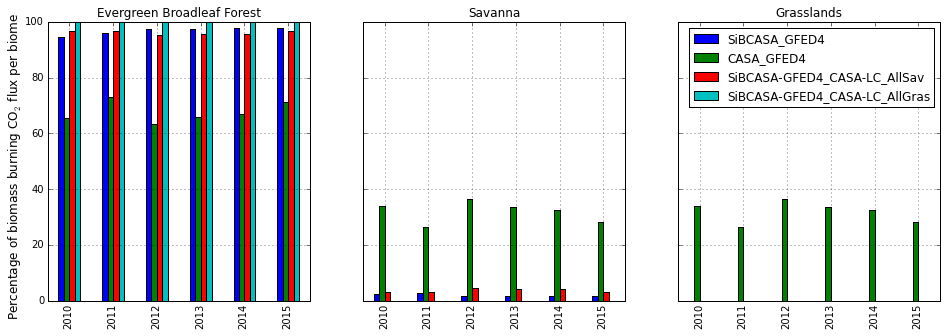

In [43]:
############################################# Plotting of selected biomes ###########################################

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,5))
fig.text(0.09, 0.5, 'Percentage of biomass burning CO$_2$ flux per biome', va='center', rotation='vertical',fontsize=12)


ax1 = evergreenbf_df.plot(kind='bar',title='Evergreen Broadleaf Forest',ax = axes[0], legend=False)
ax2 = savanna_df.plot(kind='bar',title='Savanna', ax=axes[1], legend=False)
ax3 = grasslands_df.plot(kind='bar',title='Grasslands', ax=axes[2], legend=True)

ax1.set_ylim([0,100])
ax2.set_ylim([0,100])
ax3.set_ylim([0,100])

fig.savefig('Percentage_fire_new_biome.png',bbox_inches='tight',DPI=1000)#, bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show() 


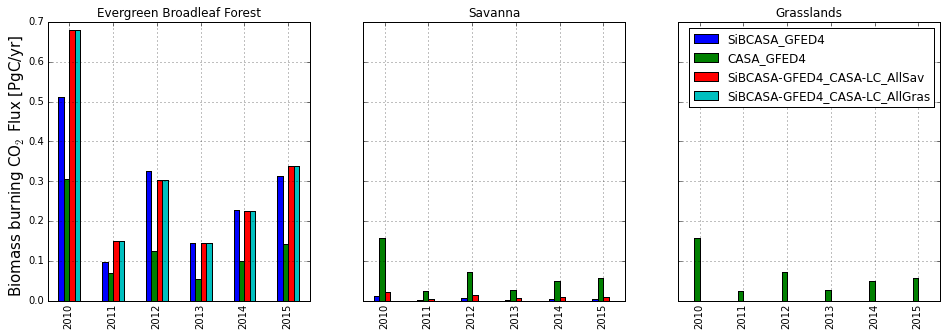

In [42]:
############################################# Plotting of selected biomes ###########################################

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,5))
fig.text(0.09, 0.5, 'Biomass burning CO$_2$ Flux [PgC/yr]', va='center', rotation='vertical',fontsize=15)

ax1 = evergreenbf_df_em.plot(kind='bar',title='Evergreen Broadleaf Forest',ax=axes[0], legend=False)
ax2 = savanna_df_em.plot(kind='bar',title='Savanna', ax=axes[1], legend=False)
ax3 = grasslands_df_em.plot(kind='bar',title='Grasslands', ax=axes[2], legend=True)

ax1.set_ylim([0,0.7])
ax2.set_ylim([0,0.7])
ax3.set_ylim([0,0.7])

fig.savefig('Emissions_fire_new_biome.png',bbox_inches='tight',DPI=1000) #, bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show() 


In [153]:
#enumerate(): Return an enumerate object. sequence must be a sequence, an iterator, 
#or some other object which supports iteration. The next() method of the 
#iterator returned by enumerate() returns a tuple containing a count (from 
#start which defaults to 0) and the values obtained from iterating over 
#sequence:

#listdir: Return a list containing the names of the entries in the directory given 
#by path. The list is in arbitrary order. It does not include the special 
#entries '.' and '..' even if they are present in the directory.

# class - datetime.datetime(year, month, day[, hour[, minute[, second[, 
# microsecond[, tzinfo]]]]])


In [136]:
evergreenbf_df_em
grasslands_df_em
savanna_df_em

,SiBCASA_GFED4,CASA_GFED4,SiBCASA-GFED4_CASA-LC_AllSav,SiBCASA-GFED4_CASA-LC_AllGras
2010,0.01236,0.15870,0.022439,NaN
2011,0.00297,0.02514,0.005214,NaN
2012,0.00607,0.07126,0.014515,NaN
2013,0.00279,0.02783,0.006223,NaN
2014,0.00404,0.04893,0.009869,NaN
2015,0.00494,0.05623,0.010710,NaN


In [121]:
evergreenbf_df

,SiBCASA_GFED4,CASA_GFED4,SiBCASA-GFED4_CASA-LC_AllSav,SiBCASA-GFED4_CASA-LC_AllGras
2010,94.60817,65.61249,96.732126,99.850565
2011,95.91773,73.07044,96.637387,99.899878
2012,97.42154,63.25734,95.419868,99.865706
2013,97.52838,65.77942,95.788747,99.835219
2014,97.60969,67.04891,95.745216,99.839887
2015,97.77381,71.43486,96.876054,99.889276


In [138]:
mask={"type":"Feature","properties":{"name":"Amazon"},"geometry":{"type":"Polygon","coordinates":[[[-54.09667968749999,-18.521283325496263],[-51.15234375,-18.35452552912664],[-49.43847656249999,-18.396230138028812],[-48.427734375,-17.308687886770024],[-47.7685546875,-15.707662769583505],[-46.53808593749999,-13.2399454992863],[-45.08789062499999,-5.703447982149503],[-45.87890625,-4.740675384778361],[-47.28515625,-4.127285323245357],[-48.603515625,-3.074695072369682],[-50.009765625,-2.1967272417616583],[-50.2734375,-0.8788717828324148],[-52.03125,0.26367094433665017],[-53.96484375,1.3182430568620136],[-56.162109375,2.1088986592431382],[-58.71093750000001,2.1088986592431382],[-59.853515625,2.6357885741666065],[-60.380859375,4.477856485570586],[-61.17187499999999,5.178482088522876],[-62.84179687499999,5.266007882805498],[-63.720703125,4.915832801313164],[-64.16015624999999,3.425691524418062],[-64.16015624999999,2.28455066023697],[-65.126953125,2.28455066023697],[-66.26953125,2.4601811810210052],[-67.32421875,2.8991526985043135],[-69.2578125,2.5479878714713835],[-72.0703125,2.1088986592431382],[-73.740234375,1.7575368113083254],[-74.70703125,0.17578097424708533],[-75.498046875,-0.5273363048115043],[-76.904296875,-1.669685500986571],[-78.486328125,-2.460181181020993],[-78.486328125,-5.178482088522876],[-78.046875,-6.664607562172573],[-74.091796875,-10.833305983642491],[-72.50976562499999,-13.496472765758952],[-71.015625,-14.349547837185362],[-70.57617187499999,-15.28418511407642],[-69.78515625,-15.199386048559994],[-68.73046875,-14.349547837185362],[-67.1484375,-15.453680224345835],[-65.390625,-17.14079039331664],[-64.86328125,-18.729501999072138],[-63.720703125,-19.228176737766248],[-61.34765625,-18.22935133838667],[-61.34765625,-17.224758206624628],[-59.501953125,-16.04581345375217],[-58.18359375,-14.519780046326085],[-56.6015625,-14.519780046326085],[-55.634765625,-15.199386048559994],[-55.01953125,-16.97274101999901],[-54.09667968749999,-18.521283325496263]]]}}


In [139]:
type(mask)

dict

In [140]:
mask

{'geometry': {'coordinates': [[[-54.09667968749999, -18.521283325496263],
    [-51.15234375, -18.35452552912664],
    [-49.43847656249999, -18.396230138028812],
    [-48.427734375, -17.308687886770024],
    [-47.7685546875, -15.707662769583505],
    [-46.53808593749999, -13.2399454992863],
    [-45.08789062499999, -5.703447982149503],
    [-45.87890625, -4.740675384778361],
    [-47.28515625, -4.127285323245357],
    [-48.603515625, -3.074695072369682],
    [-50.009765625, -2.1967272417616583],
    [-50.2734375, -0.8788717828324148],
    [-52.03125, 0.26367094433665017],
    [-53.96484375, 1.3182430568620136],
    [-56.162109375, 2.1088986592431382],
    [-58.71093750000001, 2.1088986592431382],
    [-59.853515625, 2.6357885741666065],
    [-60.380859375, 4.477856485570586],
    [-61.17187499999999, 5.178482088522876],
    [-62.84179687499999, 5.266007882805498],
    [-63.720703125, 4.915832801313164],
    [-64.16015624999999, 3.425691524418062],
    [-64.16015624999999, 2.284550660236

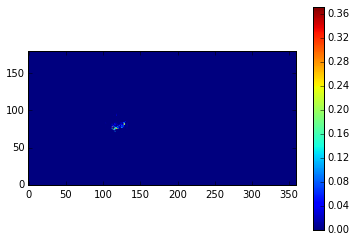

In [37]:
imshow(fires[0])
colorbar()
plt.gca().invert_yaxis()